## NBA GM Full Performance Analysis - Part 1

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
!pip install pandas numpy matplotlib seaborn pillow

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
draft_df = pd.read_csv('../outputs/draft_pick_gm_z_scores_2022_2024.csv')

In [4]:
draft_df.columns

Index(['Acquiring GM', 'Team Acquiring', 'Combined Win Shares',
       'Combined Expected Win Shares', 'Count', 'Average Draft Pick',
       'GM_Pct Change', 'Grade', 'z score'],
      dtype='object')

In [4]:
trade_df = pd.read_csv('../outputs/trades_gm_z_scores_acquired_over_lost_2022_2024.csv')

In [6]:
trade_df.columns

Index(['Team Acquiring', 'Acquiring GM', 'final_ratio', 'Grade', 'z score'], dtype='object')

In [5]:
signing_df = pd.read_csv('../outputs/signings_gm_z_scores_2022_2024.csv')

In [8]:
signing_df.columns

Index(['Acquiring GM', 'Team Acquiring', 'AAV_sum',
       'Acquired Player Win Shares Year 1', 'Count', 'Cost of Win Share',
       'Win Shares per Million', 'Grade', 'z score'],
      dtype='object')

combining all the z score datasets from each transaction into one dataframe.

In [6]:
# Select only the necessary columns, ensuring 'Team Acquiring' is included where relevant
draft_df_filtered = draft_df[['Acquiring GM', 'Team Acquiring', 'z score']]
trade_df_filtered = trade_df[['Acquiring GM', 'Team Acquiring', 'z score']]
signing_df_filtered = signing_df[['Acquiring GM', 'Team Acquiring', 'z score']]

# Rename the `z score` columns in each filtered dataframe to distinguish them
draft_df_filtered.rename(columns={'z score': 'z score_draft'}, inplace=True)
trade_df_filtered.rename(columns={'z score': 'z score_trade'}, inplace=True)
signing_df_filtered.rename(columns={'z score': 'z score_signing'}, inplace=True)

# Merge the filtered DataFrames on both 'Acquiring GM' and 'Team Acquiring'
holistic_df = draft_df_filtered.merge(
    trade_df_filtered, on=['Acquiring GM', 'Team Acquiring'], how='outer'
).merge(
    signing_df_filtered, on=['Acquiring GM', 'Team Acquiring'], how='outer'
)

# Create the new column by summing the z score columns
holistic_df['z score_holistic'] = (
    holistic_df['z score_draft'].fillna(0) +
    holistic_df['z score_trade'].fillna(0) +
    holistic_df['z score_signing'].fillna(0)
)

C:\Users\kevin\AppData\Local\Temp\ipykernel_9812\3263415123.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_df_filtered.rename(columns={'z score': 'z score_draft'}, inplace=True)
C:\Users\kevin\AppData\Local\Temp\ipykernel_9812\3263415123.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_df_filtered.rename(columns={'z score': 'z score_trade'}, inplace=True)
C:\Users\kevin\AppData\Local\Temp\ipykernel_9812\3263415123.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [7]:
holistic_df

,Acquiring GM,Team Acquiring,z score_draft,z score_trade,z score_signing,z score_holistic
0,Andy Elisburg,MIA,1.690695,0.824740,-0.032124,2.483310
1,Anthony Parker,ORL,-0.510464,NaN,-0.284261,-0.794725
2,Bob Myers,GSW,0.236156,NaN,0.011652,0.247807
3,Bobby Webster,TOR,0.245190,-0.682600,-1.078177,-1.515587
4,Brad Stevens,BOS,-0.997635,1.090684,-0.585072,-0.492023
5,Brian Wright,SAS,-0.757117,-0.841263,-0.534628,-2.133007
6,Calvin Booth,DEN,0.024365,3.326660,0.784030,4.135055
7,Chad Buchanan,IND,-0.365412,-0.397082,-0.593095,-1.355589
8,Daryl Morey,PHI,-1.037520,-0.534201,0.391013,-1.180708
9,Joe Cronin,POR,-0.835658,-0.882033,-0.591144,-2.308835


In [8]:
holistic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Acquiring GM      37 non-null     object 
 1   Team Acquiring    37 non-null     object 
 2   z score_draft     34 non-null     float64
 3   z score_trade     32 non-null     float64
 4   z score_signing   35 non-null     float64
 5   z score_holistic  37 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.0+ KB


In [9]:
# Replace 'Scott Perry' with 'Leon Rose' in the 'Acquiring GM' column
holistic_df['Acquiring GM'].replace('Scott Perry', 'Leon Rose', inplace=True)

# Group by 'Acquiring GM' and sum up the remaining columns
holistic_df = holistic_df.groupby(['Acquiring GM', 'Team Acquiring'], as_index=False).sum()

In [10]:
holistic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Acquiring GM      36 non-null     object 
 1   Team Acquiring    36 non-null     object 
 2   z score_draft     36 non-null     float64
 3   z score_trade     36 non-null     float64
 4   z score_signing   36 non-null     float64
 5   z score_holistic  36 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.8+ KB


In [11]:
# Define the grade categories
grade_labels = ['F', 'D', 'C', 'B', 'A']

# Calculate the quantiles for the 'final_ratio' column (5 bins for grades A to F)
holistic_df['Grade'] = pd.qcut(holistic_df['z score_holistic'], q=5, labels=grade_labels)

In [12]:
holistic_df.sort_values(by='z score_holistic', ascending = False)

,Acquiring GM,Team Acquiring,z score_draft,z score_trade,z score_signing,z score_holistic,Grade
26,Sam Presti,OKC,1.048110,-0.781546,4.934350,5.200914,A
6,Calvin Booth,DEN,0.024365,3.326660,0.784030,4.135055,A
31,Travis Schlenk,ATL,-0.191060,3.360875,-0.381141,2.788674,A
19,Mike Dunleavy Jr.,GSW,2.903440,-0.351376,0.047009,2.599072,A
0,Andy Elisburg,MIA,1.690695,0.824740,-0.032124,2.483310,A
22,Nico Harrison,DAL,2.254271,-0.153916,-0.297737,1.802617,A
9,James Jones,PHO,0.000000,0.176469,1.185730,1.362200,A
16,Leon Rose,NYK,1.135278,-0.201689,0.353356,1.286946,B
25,Sachin Gupta,MIN,0.000000,0.803356,0.000000,0.803356,B
11,John Hammond,ORL,0.683697,0.000000,-0.163333,0.520363,B


C:\Users\kevin\AppData\Local\Temp\ipykernel_9812\3055260880.py:36: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = Image.open(logo_path).resize((90, 45), Image.ANTIALIAS)


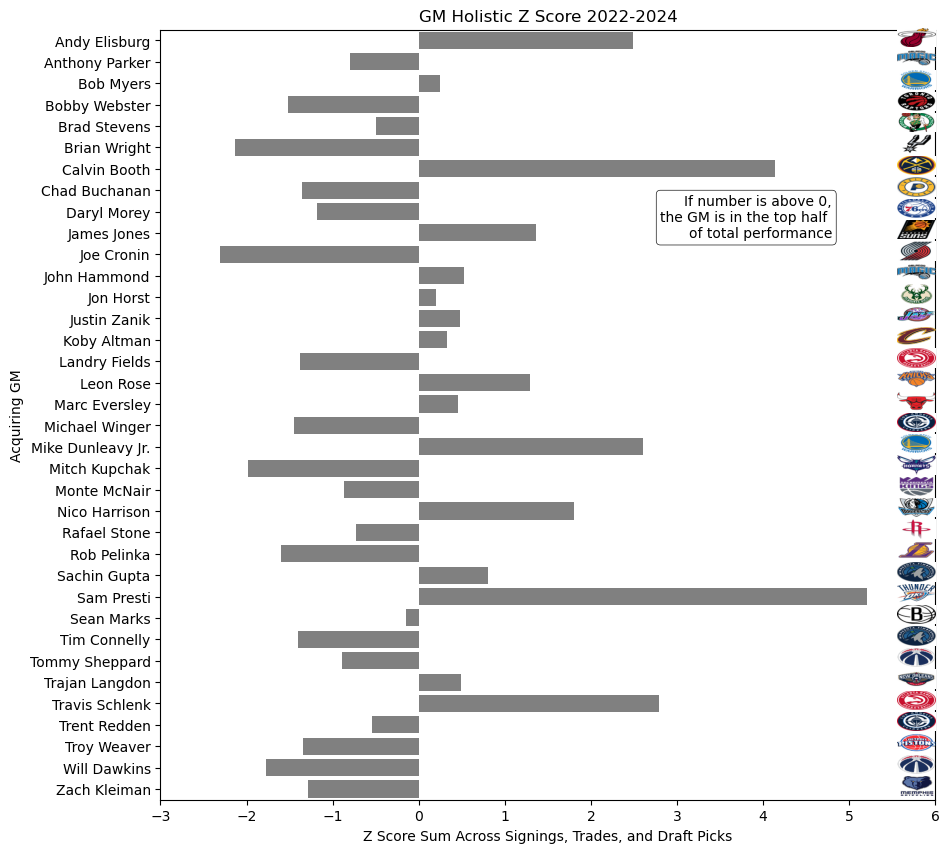

In [15]:
# Set up the plot size
plt.figure(figsize=(10, 10))

# Create a horizontal bar chart using seaborn with explicit ordering
sns.barplot(
    y='Acquiring GM', x='z score_holistic', data=holistic_df,
    color='gray', order=holistic_df['Acquiring GM']
)

# Add labels and title
plt.title('GM Holistic Z Score 2022-2024')
plt.xlabel('Z Score Sum Across Signings, Trades, and Draft Picks')
plt.ylabel('Acquiring GM')

# Set the x-axis limits
plt.xlim(-3, 6)

# Get the current axis
ax = plt.gca()

# Add team logos to the far right of the table, aligned with the bars
y_positions = [p.get_y() + p.get_height() / 2 for p in ax.patches]  # Get vertical positions of bars

# Reverse y_positions to match the reversed order of `Acquiring GM`
y_positions = y_positions[::-1]

# Adjust the logo placement (slightly lower)
logo_offset = -0.25  # Lower each logo by 0.02 units

for y_pos, (index, row) in zip(y_positions, holistic_df.iterrows()):
    gm_name = row['Acquiring GM']
    team_name = row['Team Acquiring']
    
    # Load and resize the logo image
    logo_path = f'../logos/{team_name}.png'  # Update with actual path to logos
    img = Image.open(logo_path).resize((90, 45), Image.ANTIALIAS)

    # Adjust position by applying the offset
    inset_ax = ax.inset_axes([0.95, (y_pos + logo_offset) / len(holistic_df), 0.05, 0.05])  # Adjust position and size
    inset_ax.imshow(img)
    inset_ax.axis('off')  # Hide axes for the image

# Add an annotation with a multi-line text box aligned to the far right
plt.text(
    x=plt.xlim()[1] * 0.8,
    y=len(holistic_df) * 0.2,
    s="If number is above 0,\nthe GM is in the top half \nof total performance",
    ha='right', va='top',
    color='black', fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", linewidth=0.5, alpha=0.9)
)

# Show the plot
plt.show()